In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
from pylab import rcParams
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import acquire

import warnings
warnings.filterwarnings('ignore')

In [2]:
canada, mexico = acquire.get_data()

In [3]:
mexico

,port_name,state,port_code,border,date,crossing_method,n_crossings
3,Brownsville,TX,2301,US-Mexico Border,2019-12-01,Bus Passengers,4668
6,Calexico East,CA,2507,US-Mexico Border,2019-12-01,Bus Passengers,4080
8,Columbus,NM,2406,US-Mexico Border,2019-12-01,Bus Passengers,1452
11,Douglas,AZ,2601,US-Mexico Border,2019-12-01,Bus Passengers,107
13,Eagle Pass,TX,2303,US-Mexico Border,2019-12-01,Bus Passengers,8525
...,...,...,...,...,...,...,...
353936,Douglas,AZ,2601,US-Mexico Border,1996-01-01,Trains,0
353937,San Ysidro,CA,2504,US-Mexico Border,1996-01-01,Rail Containers Full,0
353938,Santa Teresa,NM,2408,US-Mexico Border,1996-01-01,Personal Vehicles,4719
353945,Presidio,TX,2403,US-Mexico Border,1996-01-01,Pedestrians,645


In [4]:
def min_max_scale_col(col: pd.Series) -> pd.Series:
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(col.values.reshape(-1,1))
    return pd.Series(scaled[:,0], index=col.index)

mex_ports = (mexico
.set_index('date')
.sort_index()
 ['2015':'2018']
 .pivot_table(values='n_crossings', index='port_name', columns='crossing_method', aggfunc='median')
 .fillna(0)
.apply(min_max_scale_col))

In [5]:
ca_ports = (canada
.set_index('date')
.sort_index()
 ['2015':'2018']
 .pivot_table(values='n_crossings', index='port_name', columns='crossing_method', aggfunc='median')
 .fillna(0)
.apply(min_max_scale_col))

In [6]:
mex_ports.head()

crossing_method,Bus Passengers,Buses,Pedestrians,Personal Vehicle Passengers,Personal Vehicles,Rail Containers Empty,Rail Containers Full,Train Passengers,Trains,Truck Containers Empty,Truck Containers Full,Trucks
port_name,,,,,,,,,,,,
Andrade,0.000000,0.000000,0.099969,0.044933,0.039411,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
Boquillas,0.000000,0.000000,0.001427,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
Brownsville,0.054125,0.166716,0.339522,0.387070,0.332531,0.424941,0.039520,0.000000,0.20121,0.159834,0.088667,0.104748
Calexico,0.000000,0.000000,0.543730,0.319508,0.309432,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
Calexico East,0.136956,0.069416,0.029898,0.275167,0.263091,0.038662,0.001078,0.034286,0.06354,0.309028,0.126049,0.165992


In [7]:
ca_ports.head()

crossing_method,Bus Passengers,Buses,Pedestrians,Personal Vehicle Passengers,Personal Vehicles,Rail Containers Empty,Rail Containers Full,Train Passengers,Trains,Truck Containers Empty,Truck Containers Full,Trucks
port_name,,,,,,,,,,,,
Alcan,0.000767,0.005440,0.001334,0.005383,0.005783,0.0,0.0,0.0,0.0,0.005557,0.004161,0.003820
Alexandria Bay,0.090475,0.081605,0.000000,0.114808,0.120253,0.0,0.0,0.0,0.0,0.058386,0.155219,0.127528
Algonac,0.000000,0.000000,0.000000,0.000000,0.008982,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
Ambrose,0.000000,0.000000,0.000000,0.000180,0.000107,0.0,0.0,0.0,0.0,0.000030,0.000000,0.000007
Anacortes,0.000839,0.000680,0.000000,0.007479,0.007305,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


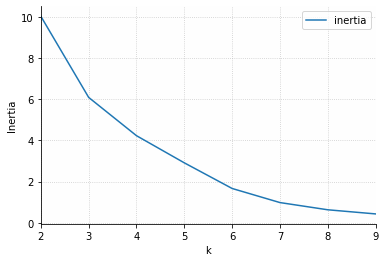

In [8]:
data = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(mex_ports)
    data.append({'k': k, 'inertia': kmeans.inertia_})
               
pd.DataFrame(data, columns=['k', 'inertia']).set_index('k').plot()
plt.ylabel('Inertia') # inertia is the sum of the squared distances from each point to its cluster center

plt.show()

In [9]:
kmeans = KMeans(n_clusters=2, random_state=123).fit(mex_ports)
mex_clusters = pd.Series(kmeans.predict(mex_ports), index=mex_ports.index, name='port_cluster')
mex_clusters

port_name
Andrade                0
Boquillas              0
Brownsville            0
Calexico               0
Calexico East          0
Columbus               0
Cross Border Xpress    0
Del Rio                0
Douglas                0
Eagle Pass             0
El Paso                1
Hidalgo                0
Laredo                 1
Lukeville              0
Naco                   0
Nogales                0
Otay Mesa              1
Presidio               0
Progreso               0
Rio Grande City        0
Roma                   0
San Luis               0
San Ysidro             1
Santa Teresa           0
Sasabe                 0
Tecate                 0
Tornillo-Fabens        0
Name: port_cluster, dtype: int32

In [10]:
# original DataFrame with added cluster column

mexico = mexico.set_index('port_name').join(mex_clusters)

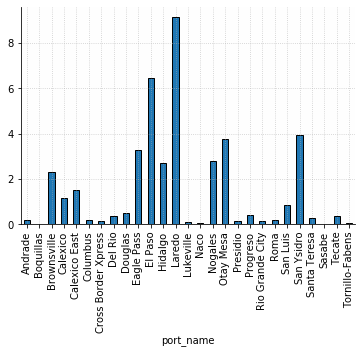

In [11]:
mex_ports.sum(axis=1).plot.bar()

plt.show()

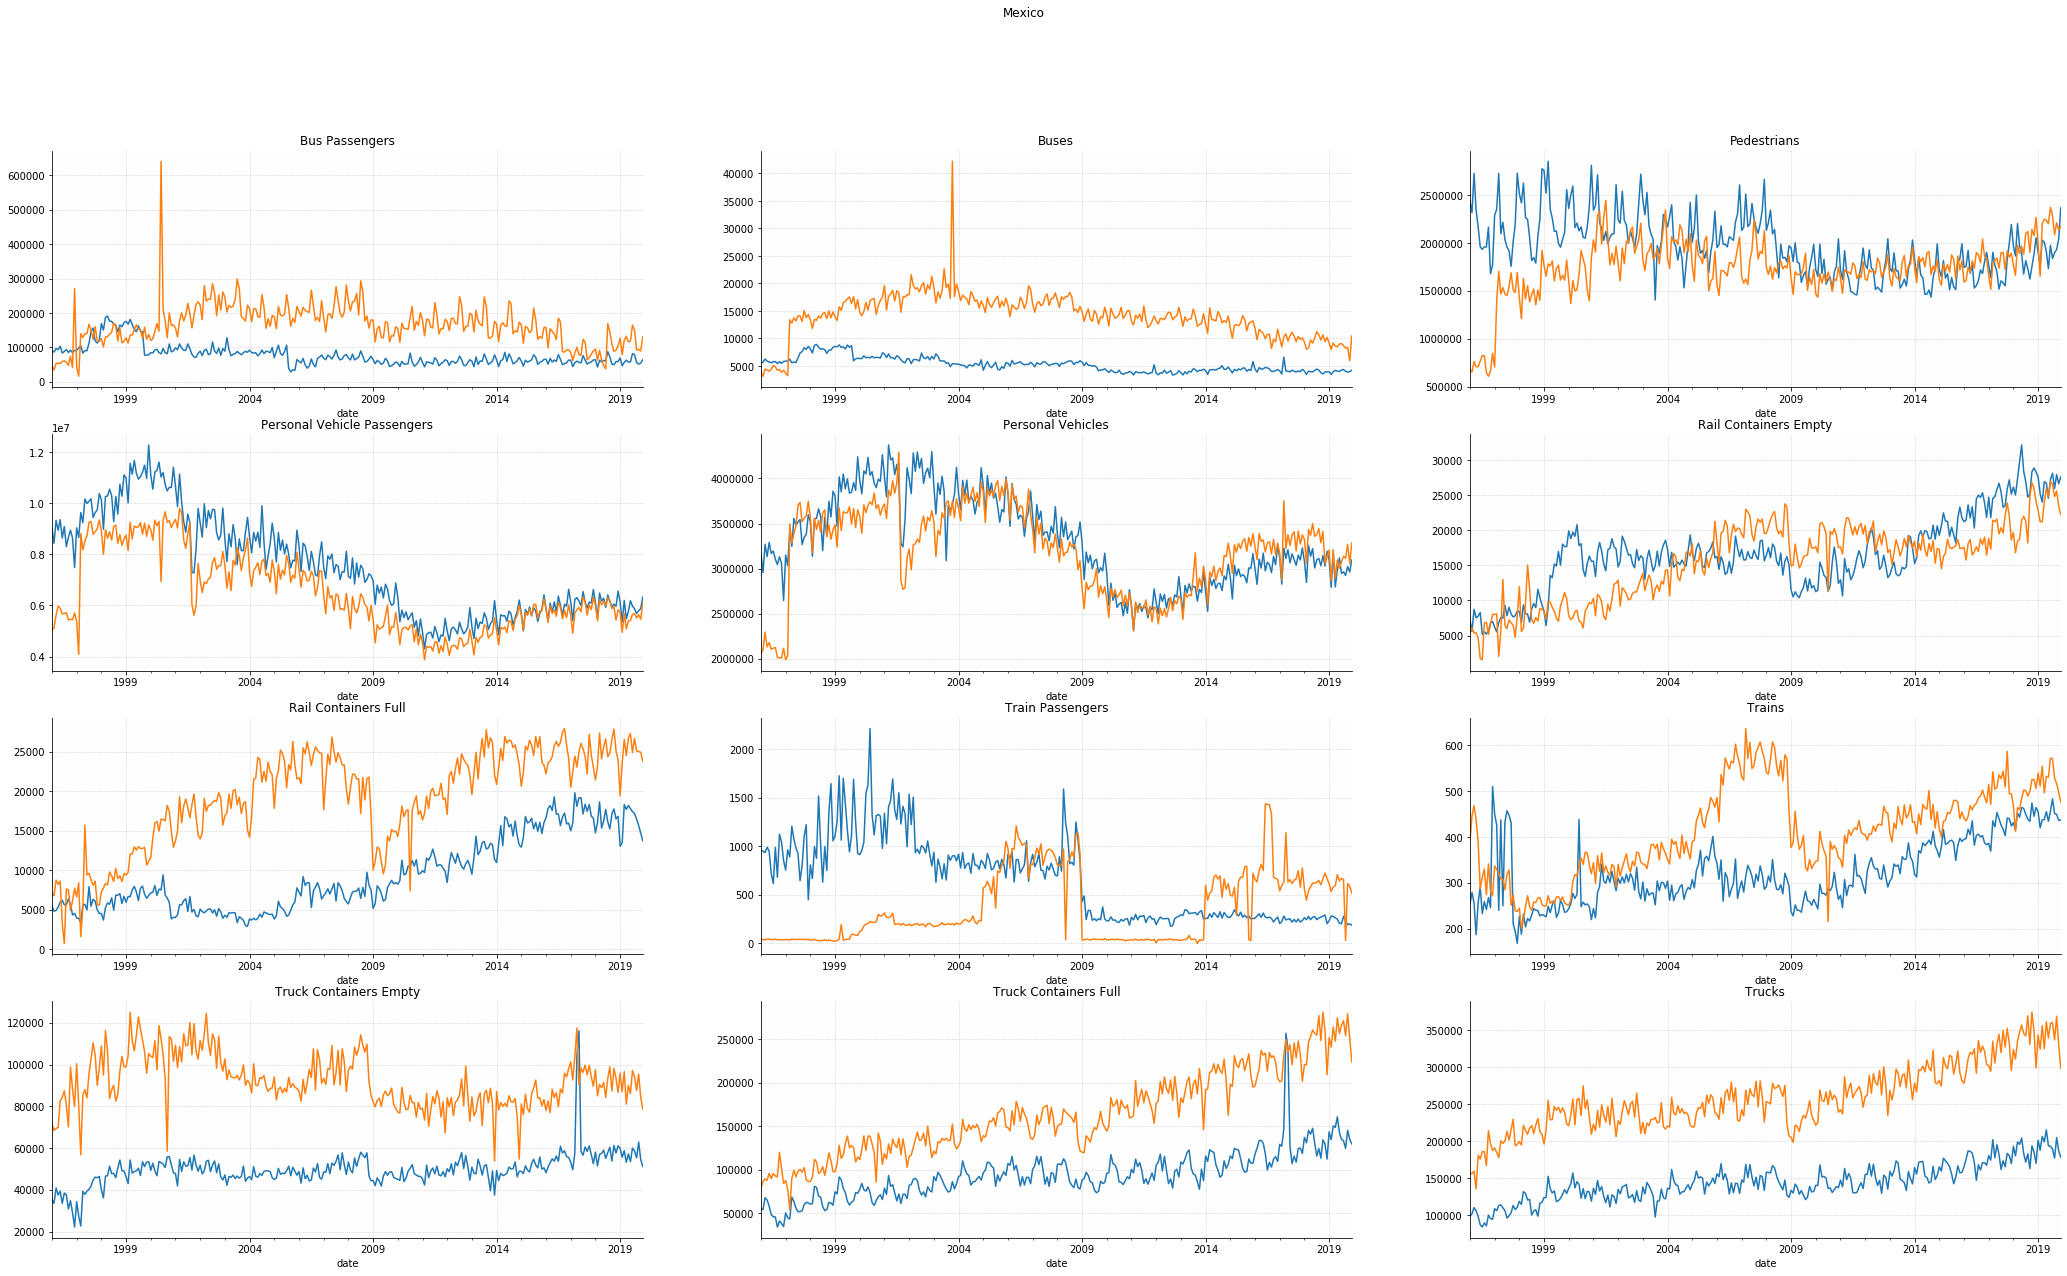

In [12]:
fig, axs = plt.subplots(4, 3, figsize=(36, 20))
fig.suptitle('Mexico')

for ax, (method, data) in zip(axs.ravel(), mexico.groupby('crossing_method')):
    data.pivot_table('n_crossings', 'date', 'port_cluster', aggfunc='sum').plot(ax=ax)
    ax.set(title=method)
    ax.get_legend().remove()
#    ax.set_yscale('log')

In [13]:
from fbprophet import Prophet